# Info
: 기사에 사용된 단어들을 이용해 단어들의 경향성을 찾아내기 위한 코드4

In [8]:
import pandas as pd
import glob

file_name = glob.glob('../article/headline_noun_keyword*')

keyword_df = []
for file in file_name:
    df = pd.read_pickle(file)
    keyword_df.append(df)

keyword_all = pd.concat(keyword_df, ignore_index = True)
keyword = keyword_all[keyword_all['week'] <= 807]
keyword

,date,co,headline,week,pos
0,2006.01.01. 오후 11:23,매일경제,취득세ㆍ등록세 0.5%P씩 인하,0,"[취득세, 인하]"
1,2006.01.01. 오후 11:23,매일경제,양도세 부담 덜자 하반기 매물 늘듯,0,"[양도세, 부담, 하반기, 매물]"
2,2006.01.01. 오후 11:23,매일경제,서울 대치동 57평형 보유세 651만원,0,"[서울, 대치동, 평, 보유, 세, 만, 원]"
3,2006.01.01. 오후 11:23,매일경제,양도세 줄이는 방법 필요경비 증빙서류 꼭 챙기자,0,"[양도세, 방법, 필요, 경비, 증빙, 서류]"
4,2006.01.01. 오후 11:23,매일경제,올해 실거래가 신고제 폭풍 이중계약서 관행 사라진다,0,"[올해, 실, 거래, 신고, 폭풍, 이중, 계약서, 관행]"
...,...,...,...,...,...
1065646,2021.06.26. 오전 5:00,뉴시스,비상 걸린 전세⑥전문가들 꼬일 대로 꼬였다…규제라도 풀어야,807,"[비상, 전세, 전문가, 대로, 규제]"
1065647,2021.06.26. 오전 3:04,세계일보,‘래미안 원베일리’ 청약에 만점 통장 등장… 올해 두 번째,807,"[래미안, 원, 베일리, 청약, 만점, 통장, 등장, 올해, 번]"
1065648,2021.06.26. 오전 3:01,동아일보,‘10억 로또 청약’ 원베일리… 7인 가족 만점통장 나왔다,807,"[억, 로또, 청약, 원, 베일리, 인, 가족, 만점, 통장]"
1065649,2021.06.26. 오전 3:01,동아일보,故 이건희 회장 이태원 주택 210억에 매물로,807,"[이건희, 회장, 이태원, 주택, 억, 매물]"


In [9]:
gu_name = ['강남구','강동구','강서구','강북구','관악구','광진구','구로구','금천구',
          '노원구','동대문구','도봉구','동작구','마포구','서대문구','성동구','성북구',
          '서초구','송파구','영등포구','용산구','양천구','은평구','종로구','중구','중랑구']

many = len(gu_name)

In [10]:
gu_data = []

for gu in gu_name:
    df = pd.read_pickle(f'../seoul_apt_trade_data/{gu}_trade.pkl')
    df = df[df['거래주'] <= 807]
    df = df.groupby(['거래주']).mean(['면적당가격'])
    for i in range(1,808):
        try:
            if df['면적당가격'][i]:
                continue
        except:
            df.loc[i] = df.loc[i-1]
    gu_data.append(df)

In [11]:
df = pd.read_pickle("../article/selectedd_company_article.pkl")

In [12]:
origin_now_co = list(set(df['co']))

In [13]:
company_article_df = {}
for name in origin_now_co:
    article_df = df[df['co'] == name]
    article_df = article_df.groupby(['week'])['pos'].sum()
    company_article_df[name] = article_df

In [14]:
company_article_count = df.groupby(['week']).count()['result']
company_article_count

week
0       453
1       466
2       441
3       525
4       456
       ... 
803    1463
804    1594
805    1434
806    1318
807    1410
Name: result, Length: 808, dtype: int64

In [15]:
company_article_count_co = {}

for name in origin_now_co:
    article_df = df[df['co'] == name]
    article_df = article_df.groupby(['week']).sum()
    company_article_count_co[name] = article_df

In [29]:
for name in origin_now_co:
    print(f'{name}: {company_article_count_co[name].sum()[0]}')

문화일보: 3651
경향신문: 17761
세계일보: 24205
파이낸셜뉴스: 96791
매일신문: 2017
데일리안: 14029
헤럴드경제: 63949
동아일보: 26748
아이뉴스24: 7103
강원일보: 3135
이데일리: 78315
한겨레: 6004
머니투데이: 76920
매일경제: 111656
한국경제: 70121
서울경제: 53151
노컷뉴스: 9496
한국경제TV: 64141
국민일보: 4518
연합뉴스: 50657


In [11]:
from datetime import date
start_date = date(2006,1,1)
mh = date(2008,2,24)
mb = date(2013,2,24)
gh = date(2016,12,9)
ga = date(2017,5,10) #황교안 대행
ji = date(2022,5,9)
mhw = (mh - start_date).days//7
mbw = (mb - start_date).days//7
ghw = (gh - start_date).days//7
gaw = (ga - start_date).days//7
jiw = (ji - start_date).days//7

Text(0, 0.5, '기사 수')

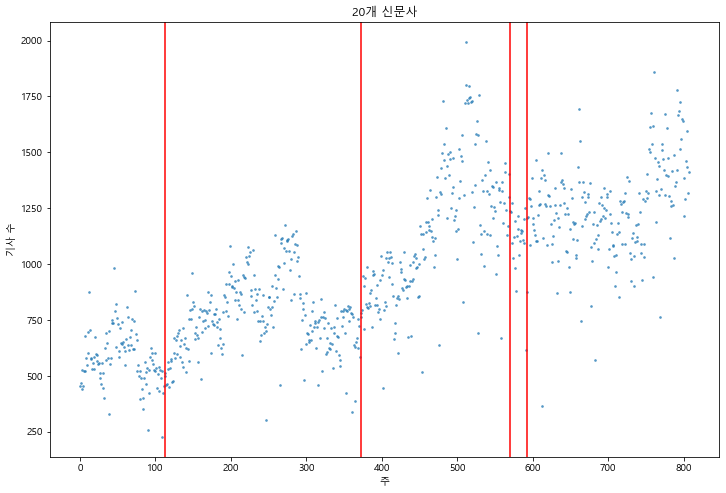

In [34]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/malgun.ttf"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
plt.rcParams["figure.figsize"] = (12,8)
x1 = pd.Series([i for i in range(len(company_article_count))])
y1 = company_article_count
plt.scatter(x1, y1, s = 3, alpha = 0.6)
plt.axvline(x = mhw, c = 'r')
plt.axvline(x = mbw, c = 'r')
plt.axvline(x = ghw, c = 'r')
plt.axvline(x = gaw, c = 'r')
plt.title("20개 신문사")
plt.xlabel("주")
plt.ylabel("기사 수")

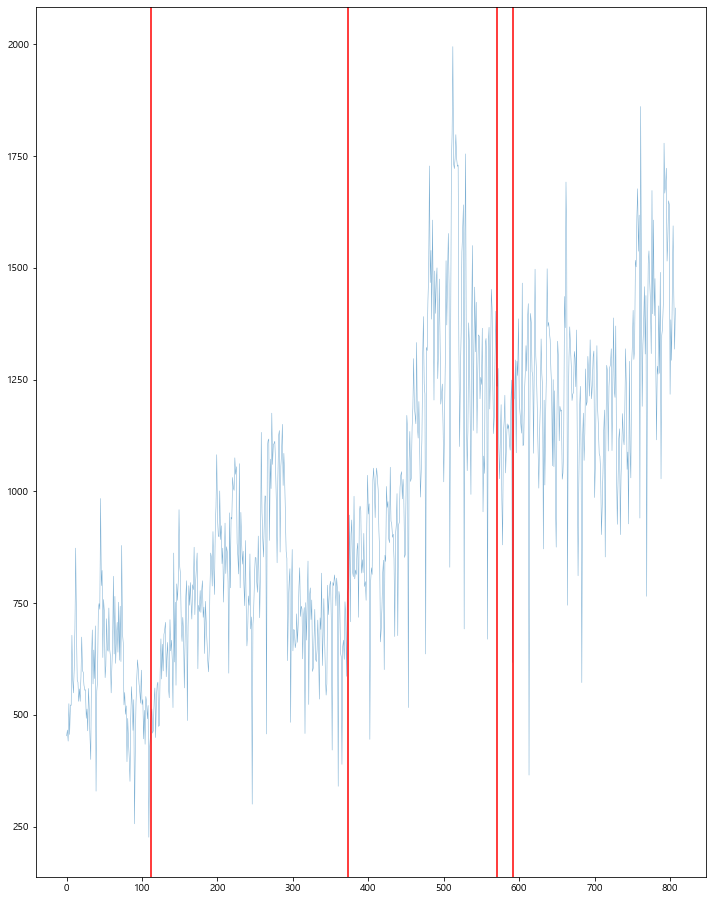

In [31]:
plt.plot(y1, linewidth = 0.5,alpha = 0.6)
plt.axvline(x = mhw, c = 'r')
plt.axvline(x = mbw, c = 'r')
plt.axvline(x = ghw, c = 'r')
plt.axvline(x = gaw, c = 'r')
plt.show()

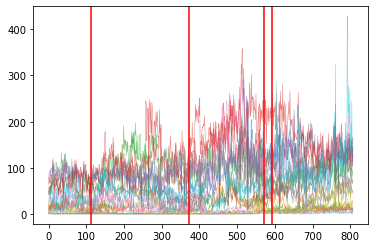

In [14]:
for name in origin_now_co:
    plt.plot(company_article_count_co[name], linewidth = 0.5,alpha = 0.6)
plt.axvline(x = mhw, c = 'r')
plt.axvline(x = mbw, c = 'r')
plt.axvline(x = ghw, c = 'r')
plt.axvline(x = gaw, c = 'r')
plt.show()

co_name: 문화일보
평균: 8.335616438356164, 표준편차: 4.630429742070484
co_name: 경향신문
평균: 22.035980148883375, 표준편차: 15.459823971729845
co_name: 세계일보
평균: 29.993804213135068, 표준편차: 28.96800170627796
co_name: 파이낸셜뉴스
평균: 119.79084158415841, 표준편차: 41.18236488451932
co_name: 매일신문
평균: 10.844086021505376, 표준편차: 7.90089919433521
co_name: 데일리안
평균: 42.00299401197605, 표준편차: 21.323125162242235
co_name: 헤럴드경제
평균: 79.14480198019803, 표준편차: 59.696237037534715
co_name: 동아일보
평균: 34.20460358056266, 표준편차: 25.52143191716667
co_name: 아이뉴스24
평균: 17.32439024390244, 표준편차: 19.901828502543367
co_name: 강원일보
평균: 5.024038461538462, 표준편차: 2.607754648486802
co_name: 이데일리
평균: 96.92450495049505, 표준편차: 46.76719206646779
co_name: 한겨레
평균: 7.838120104438643, 표준편차: 5.765791262235714
co_name: 머니투데이
평균: 95.1980198019802, 표준편차: 29.143330728275565
co_name: 매일경제
평균: 143.33247753530168, 표준편차: 57.68116523642099
co_name: 한국경제
평균: 88.53661616161617, 표준편차: 40.031544738156505
co_name: 서울경제
평균: 65.7809405940594, 표준편차: 35.20223439887086
co_name: 노컷

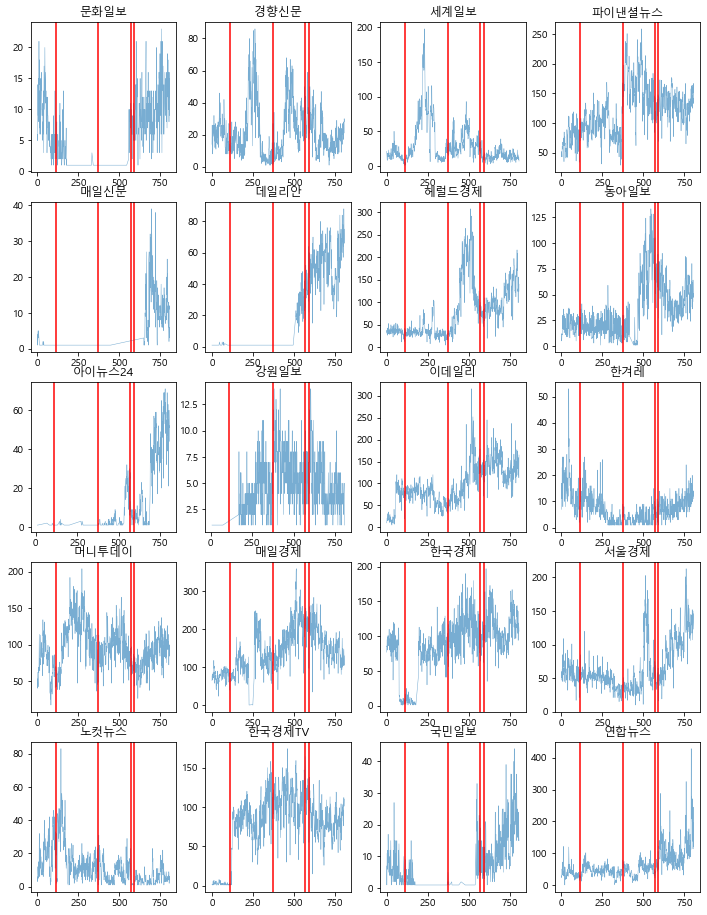

In [28]:
i = 1

plt.rcParams["figure.figsize"] = (12,16)
for name in origin_now_co:
    print(f'co_name: {name}')
    print(f'평균: {company_article_count_co[name].mean()[0]}, 표준편차: {company_article_count_co[name].std()[0]}')
    plt.subplot(5,4,i)
    i += 1
    plt.title(name)
    plt.plot(company_article_count_co[name], linewidth = 0.5,alpha = 0.6)
    plt.axvline(x = mhw, c = 'r')
    plt.axvline(x = mbw, c = 'r')
    plt.axvline(x = ghw, c = 'r')
    plt.axvline(x = gaw, c = 'r')
plt.show()

In [41]:
gu_data = []

for gu in gu_name:
    df = pd.read_pickle(f'../seoul_apt_trade_data/{gu}_trade.pkl')
    df = df[df['거래주'] <= 807]
    gu_data.append(df)
    
total_df = pd.concat(gu_data, ignore_index = True)
total_df = total_df.groupby(['거래주']).mean(['면적당가격'])
total_df

,전용면적,면적당가격
거래주,,
0,78.002055,595.453335
1,80.060542,533.340257
2,76.717184,511.472577
3,78.770315,502.503814
4,79.749863,462.708001
...,...,...
803,73.000736,1335.063387
804,72.728662,1337.254922
805,69.282561,1263.021549


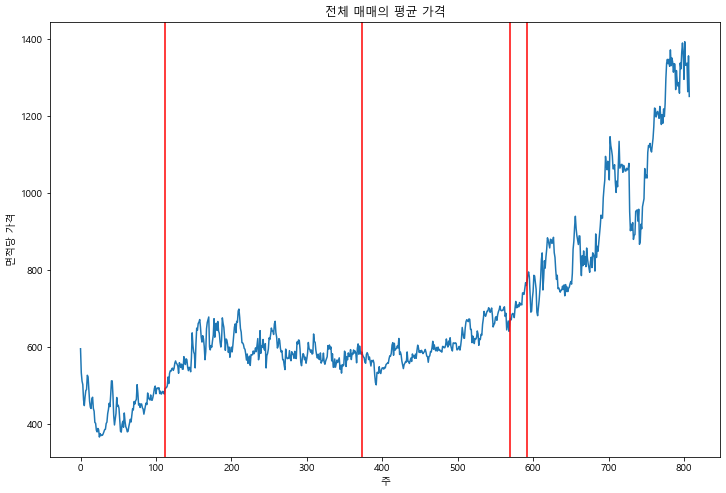

In [43]:
plt.plot(total_df['면적당가격'])
plt.title("전체 매매의 평균 가격")
plt.axvline(x = mhw, c = 'r')
plt.axvline(x = mbw, c = 'r')
plt.axvline(x = ghw, c = 'r')
plt.axvline(x = gaw, c = 'r')
plt.xlabel("주")
plt.ylabel("면적당 가격")
plt.show()

In [17]:
company_article_df['매일경제']

week
0      [취득세, 인하, 양도세, 부담, 하반기, 매물, 서울, 대치동, 평, 보유, 세,...
1      [인천, 송도, 국제, 도시, 층, 업무, 복합, 빌딩, 년, 간, 만, 가구, 공...
2      [강남, 재건축, 거래, 호, 재건축, 신규, 분양, 서울, 뜸, 수도, 군사, 보...
3      [재건축, 승인, 환수, 판교, 중대, 공공, 임대, 청약, 예금, 가입자, 주거,...
4      [판교, 사이버, 견본, 주택, 내용, 판교, 차별, 울산, 법조, 타운, 용지, ...
                             ...                        
803    [평생, 내, 집, 눈물, 악성, 미분양, 아파트, 이번, 주, 동탄, 반값, 아파...
804    [이젠, 중동, 美, 천조, 건설, 시장, 집중, 공략, 부동산, 투기, 벌금형, ...
805    [서리, 풀, 터널, 개통, 년, 생활, 스페셜, 리포트, 방배동, 만, 가구, 동...
806    [억, 로또, 포, 원, 베일리, 실거, 주, 의무, 전세, 잔금, 사람, 도장, ...
807    [잠원, 이촌, 사당, 이웃, 합리, 모델, 역세, 청년, 주택, 속도, 조절, 서...
Name: pos, Length: 779, dtype: object

In [19]:
index = [i for i in range(808)]

for name in origin_now_co:
    df = company_article_df[name]
    for i in index:
        if i not in df.index:
            df.loc[i] = []
    company_article_df[name] = df.sort_index()

In [9]:
up_keyword = ['상승', '상승세', '오름세', '급등', '폭']
down_keyword = ['하락', '하락세', '약세', '보합', '급락']